In [1]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline


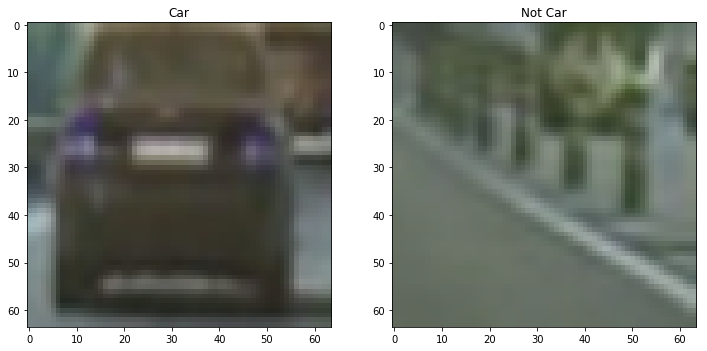

In [2]:
image_car = cv2.imread('./vehicles/GTI_MiddleClose/image0001.png')
image_notcar = cv2.imread('./non-vehicles/non-vehicles/GTI/image5.png')

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.title('Car')
plt.imshow(image_car)
plt.subplot(122)
plt.title('Not Car')
plt.imshow(image_notcar)

In [3]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256),display=False):
    # Compute the histogram of the RGB channels separately
    ch1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ch2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    ch3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((ch1_hist[0], ch2_hist[0], ch3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    
    if display :

        # Generating bin centers
        bin_edges = ch1_hist[1]
        bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

        return ch1_hist, ch2_hist, ch3_hist, bin_centers, hist_features
    
    return hist_features
    

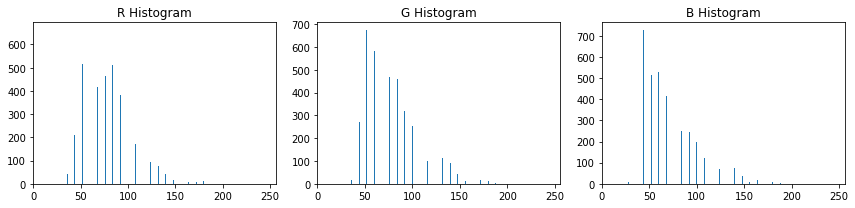

In [4]:
rh, gh, bh, bincen, feature_vec = color_hist(image_car, nbins=32, bins_range=(0, 256),display=True)

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

In [5]:
# Define a function to compute color histogram features 
def bin_spatial(img, size=(32, 32)):
         
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

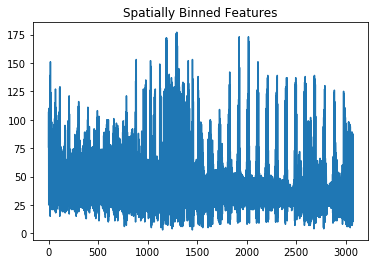

In [6]:
feature_image = cv2.cvtColor(image_car, cv2.COLOR_RGB2HLS)
feature_vec = bin_spatial(feature_image, size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

In [7]:

def color_feature(img,color_space,spatial_size=(16,16)):

    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)  

    ch1_h, ch2_h, ch3_h, bincen, feature_vec = color_hist(feature_image, nbins=32, bins_range=(0, 256),display=True)

    feature_bin = bin_spatial(feature_image, size=spatial_size)


    # Plot a figure with all three bar charts
    if ch1_h is not None:
        fig = plt.figure(figsize=(15,3))
        plt.subplot(161)
        plt.title('{} Image'.format(color_space))
        plt.imshow(feature_image)

        if len(color_space) > 3:
            color_space = [color_space[0],color_space[1:3],color_space[3:5]]

        plt.subplot(162)
        plt.bar(bincen, ch1_h[0])
        plt.xlim(0, 256)
        plt.title('{} Histogram'.format(color_space[0]))
        plt.subplot(163)
        plt.bar(bincen, ch2_h[0])
        plt.xlim(0, 256)
        plt.title('{} Histogram'.format(color_space[1]))
        plt.subplot(164)
        plt.bar(bincen, ch3_h[0])
        plt.xlim(0, 256)
        plt.title('{} Histogram'.format(color_space[2]))
        
        plt.subplot(165)
        plt.plot(feature_vec)
        plt.title('Color Hist Feature')

        plt.subplot(166)
        # Plot features
        plt.plot(feature_bin)
        plt.title('Spatially Binned Features')

        fig.tight_layout()
    else:
        print('Your function is returning None for at least one variable...')


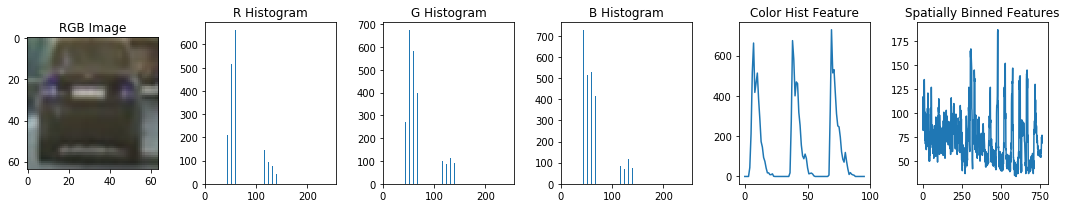

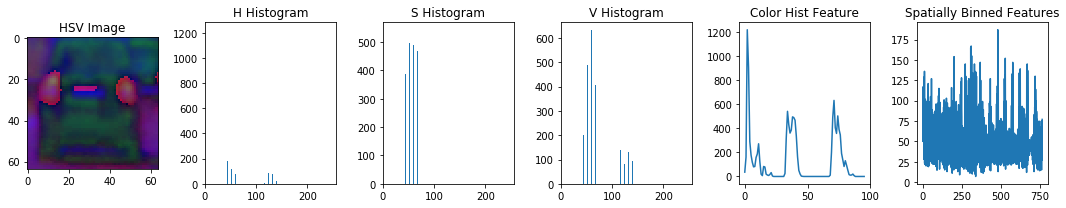

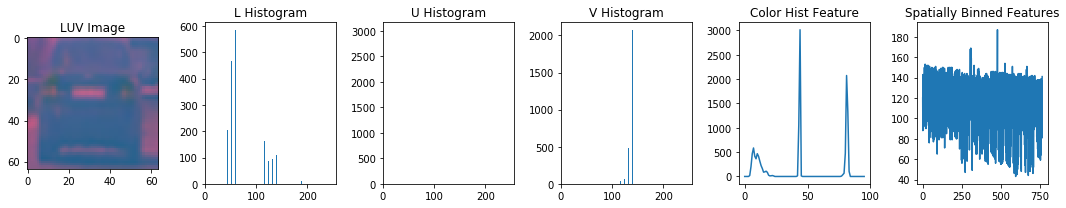

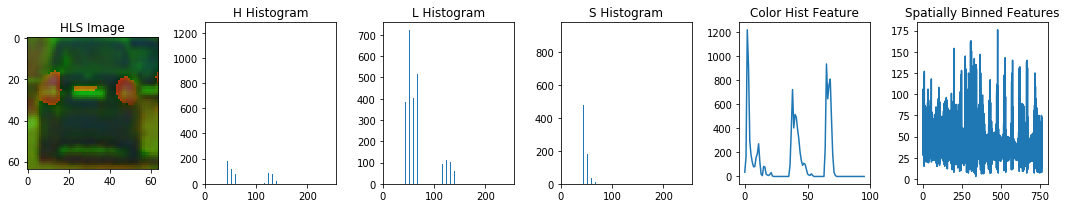

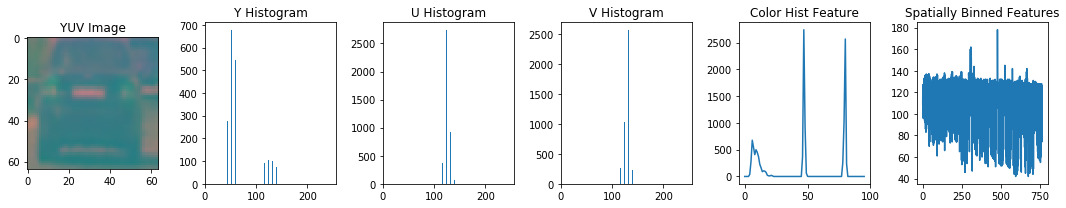

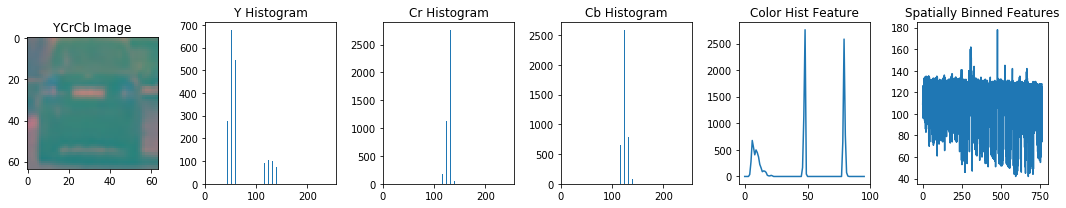

In [8]:
img = np.copy(image_car)
color_spaces = ['RGB','HSV','LUV','HLS','YUV','YCrCb']

for color_space in color_spaces :
    
    color_feature(img,color_space)
    

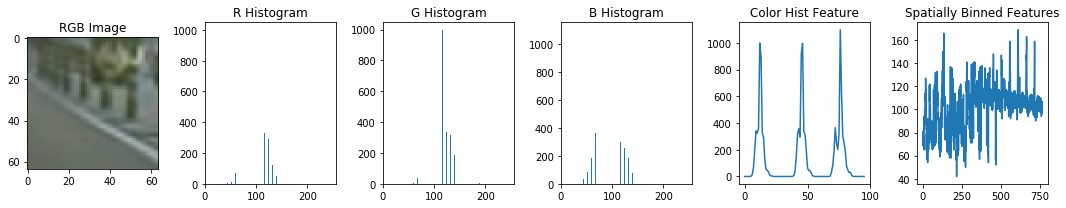

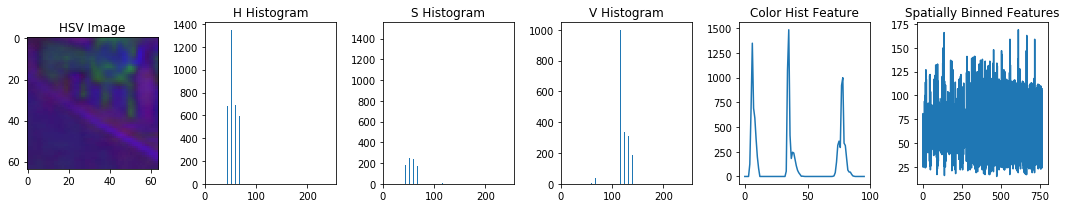

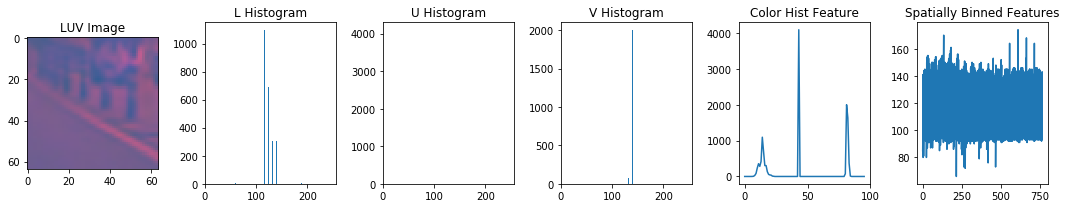

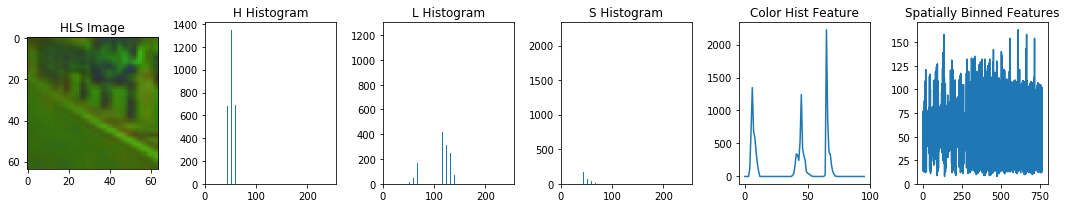

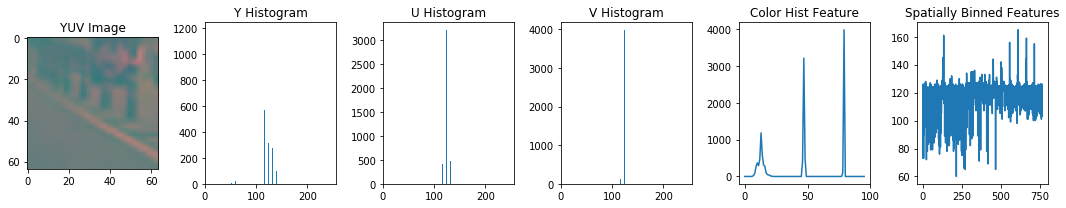

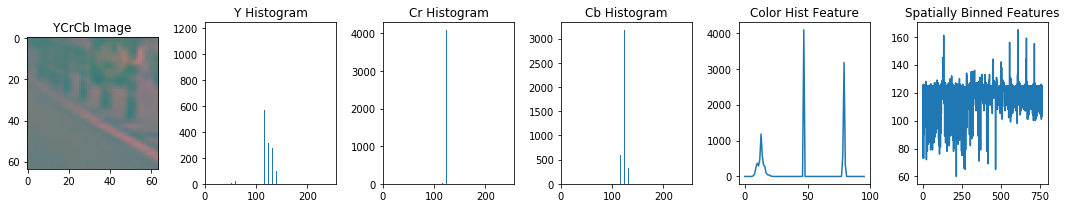

In [9]:
img = np.copy(image_notcar)
color_spaces = ['RGB','HSV','LUV','HLS','YUV','YCrCb']

for color_space in color_spaces :
    
    color_feature(img,color_space)

In [10]:
from skimage.feature import hog

# Define a function to return HOG features and visualization
# Features will always be the first element of the return
# Image data will be returned as the second element if visualize= True
# Otherwise there is no second return element

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features


C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


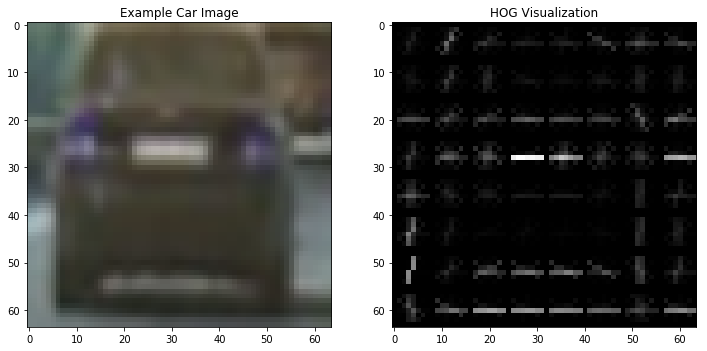

In [11]:
gray = cv2.cvtColor(image_car, cv2.COLOR_BGR2GRAY)
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=True)


# Plot the examples
fig = plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(image_car, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

In [12]:
def hog_feature(image,color_space='YUV',pix_per_cells):
    # Plot the examples
    fig = plt.figure(figsize=(16,12))
    plt.subplot(1,len(pix_per_cells)+1,1)
        
    plt.imshow(gray,'gray')
    plt.title('Example Car Image')

    for i in range(len(pix_per_cells)):

        plt.subplot(1,len(pix_per_cells)+1,i+2)

        features, hog_image = get_hog_features(gray, orient= 12, 
                            pix_per_cell= pix_per_cells[i], cell_per_block= 2, 
                            vis=True, feature_vec=False)

        plt.imshow(hog_image, cmap='gray')
        plt.title('Pix_per of HOG Vis:{}'.format(pix_per_cells[i]))

In [65]:
def hog_feature(img,color_space,pix_per_cells):

    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)  

    # display
    for ch in range(feature_image.shape[2]):
        image_ch = feature_image[:,:,ch]
        # Plot the examples
        fig = plt.figure(figsize=(16,12))
        plt.subplot(1,len(pix_per_cells)+1,1)
        plt.imshow(image_ch)
        plt.title('Car Image:ch{}'.format(ch+1))
        
        for i in range(len(pix_per_cells)):

            plt.subplot(1,len(pix_per_cells)+1,(i+2))

            features, hog_image = get_hog_features(image_ch, orient= 12, 
                                pix_per_cell= pix_per_cells[i], cell_per_block= 2, 
                                vis=True, feature_vec=False)

            plt.imshow(hog_image, cmap='gray')
            plt.title('Pix_per of HOG Vis:{}'.format(pix_per_cells[i]))

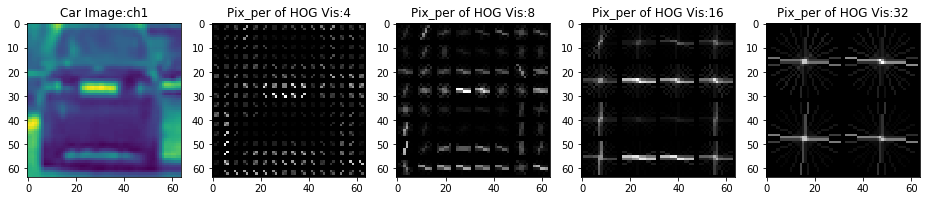

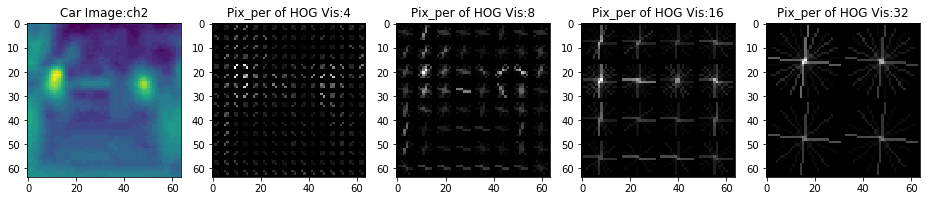

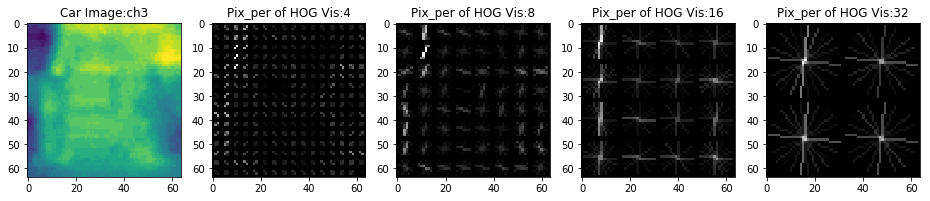

In [66]:
pix_per_cells = [4,8,16,32]
hog_feature(image_car,'YUV',pix_per_cells)

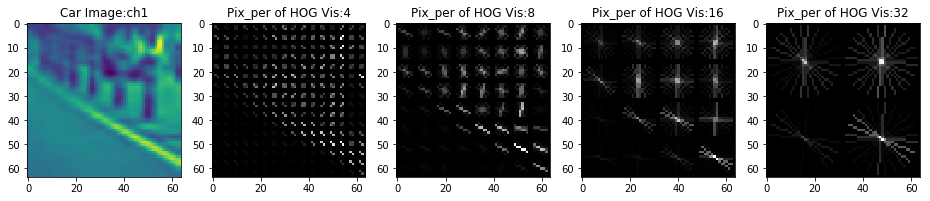

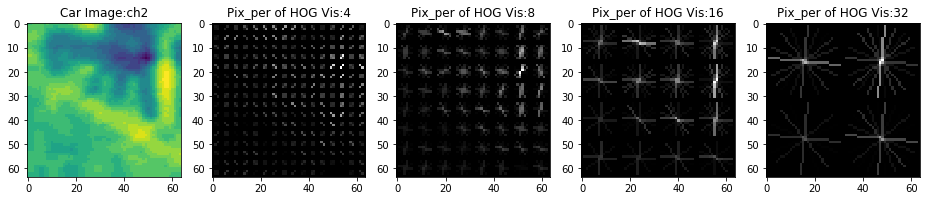

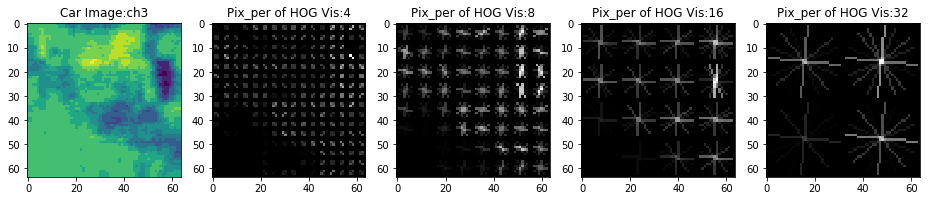

In [67]:
pix_per_cells = [4,8,16,32]
hog_feature(image_notcar,'YUV',pix_per_cells)

In [15]:
# Define a function to extract features from a single image window
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [16]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog


# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        
        img_features = single_img_features(image, color_space, spatial_size,
                        hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel,
                        spatial_feat, hist_feat, hog_feat)
        
        features.append(img_features)
 
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


In [17]:
def generate_data(cars_name,notcars_name,flip=False):
    
    cars = []
    notcars = []

    if flip :
        
        for car_name,i in zip(cars_name,range(len(cars_name))) :
            cars.append(car_name)
            image = cv2.imread(car_name)
            image_flip = cv2.flip(image,1)
            cv2.imwrite('./cars/car{}.png'.format(i),image_flip)
            cars.append('./cars/car{}.png'.format(i))

        for notcar_name,i in zip(notcars_name,range(len(notcars_name))) :
            notcars.append(notcar_name)
            image = cv2.imread(notcar_name)
            image_flip = cv2.flip(image,1)
            cv2.imwrite('./notcars/notcar{}.png'.format(i),image_flip)
            notcars.append('./notcars/notcar{}.png'.format(i))
    else :
        cars = cars_name + glob.glob('./cars/*.png')
        notcars = notcars_name + glob.glob("./notcars/*.png")

    return cars,notcars

In [18]:
# Read in cars and notcars
cars_name = glob.glob('./vehicles/**/*.png')
notcars_name = glob.glob('./non-vehicles/non-vehicles/**/*.png')

cars,notcars = generate_data(cars_name,notcars_name)

print ('Num of cars:',len(cars))
print ('Num of notcars :',len(notcars))

Num of cars: 17584
Num of notcars : 17936


In [19]:
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 12000
cars_sample = cars[0:sample_size]
notcars_sample = notcars[0:sample_size]

print ('Num of sample:',len(cars_sample))

Num of sample: 12000


In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

import time

### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()


t=time.time()
car_features = extract_features(cars_sample, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars_sample, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract features...')

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


153.26 Seconds to extract features...
Using: 12 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 2160


In [21]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import LinearSVC,SVC
import time

# Use a linear SVC 
svc = LinearSVC()

# Check the training time for the SVC
t=time.time()

svc.fit(X_train, y_train)

t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

7.81 Seconds to train SVC...
Test Accuracy of SVC =  0.9915


In [22]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        
        #print (np.shape(features))
        
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows


In [23]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    # Compute the span of the region to be searched    
    # Compute the number of pixels per step in x/y
    # Compute the number of windows in x/y
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    # Return the list of windows
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    
    
    return window_list

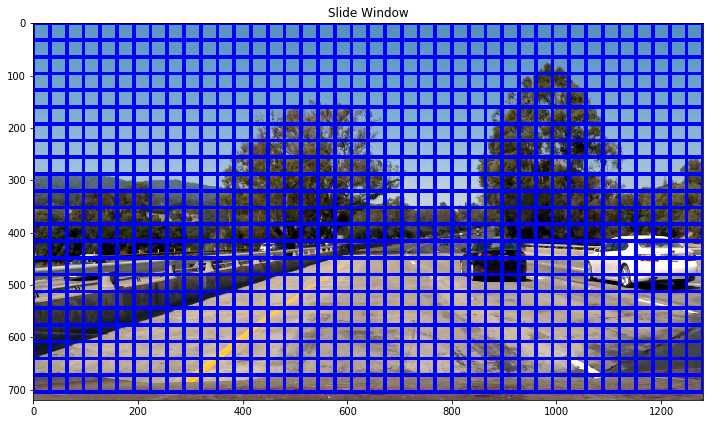

In [24]:
image_test = mpimg.imread('./test_images/test1.jpg')

windows = slide_window(image_test, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image_test, windows, color=(0, 0, 255), thick=6)   
plt.figure(figsize=(12,12))
plt.title('Slide Window')
plt.imshow(window_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


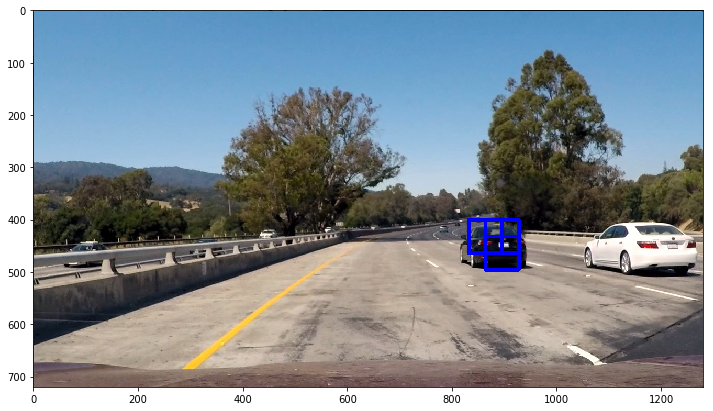

In [25]:
image = np.copy(image_test)
draw_image = np.copy(image_test)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400,700], 
                    xy_window=(64,64), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.figure(figsize=(12,12))
plt.imshow(window_img)

In [26]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = img_tosearch
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ctrans_disp = np.uint8(ctrans_tosearch * 255)

    #print (ctrans_tosearch.shape)
    
    # Define blocks and steps as above
    nxblocks = (ctrans_tosearch.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ctrans_tosearch.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    winds=[]
    
    #print ("ctrans_tosearch.shape",np.shape(ctrans_tosearch))
    #print ('nxblocks:{},nyblocks:{},nblocks_per_window:{},nxsteps:{},nysteps:{}'.format(nxblocks,nyblocks,nblocks_per_window,nxsteps,nysteps))
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            
            img_features = single_img_features(subimg, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
            
            test_features = X_scaler.transform(np.array(img_features).reshape(1, -1))
              
            test_prediction = svc.predict(test_features)
                       
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
                winds.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img,winds,ctrans_disp


C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


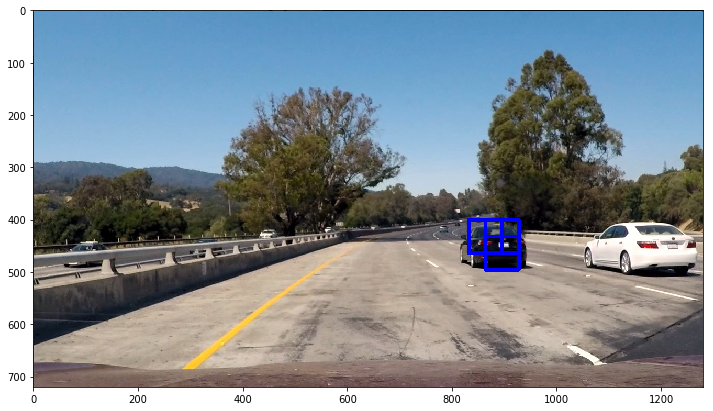

In [27]:
ystart = 400
ystop = 650
scale = 1.0

X_scaler = X_scaler

img = np.copy(image_test)

windows_out = []
    
out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

windows_out.append(windows)

plt.figure(figsize=(12,10))

plt.imshow(out_img)

#print (windows)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


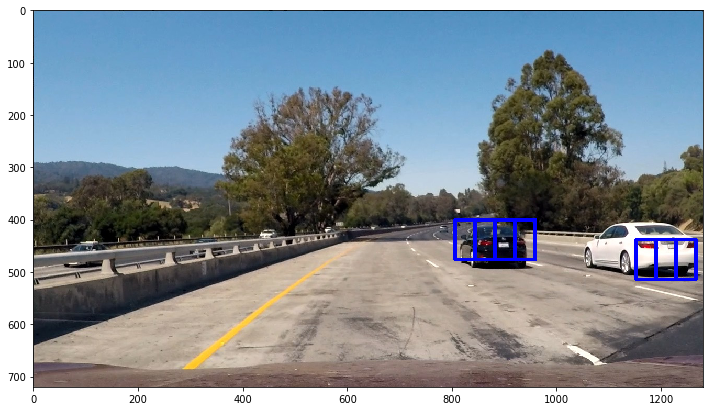

In [29]:
ystart = 400
ystop = 650
scale = 1.2

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

windows_out.append(windows)
plt.figure(figsize=(12,10))
plt.imshow(out_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


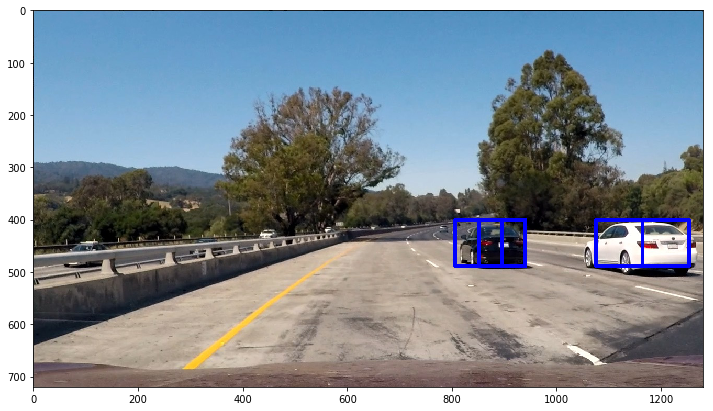

In [30]:
ystart = 400
ystop = 650
scale = 1.4

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

windows_out.append(windows)
plt.figure(figsize=(12,10))
plt.imshow(out_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


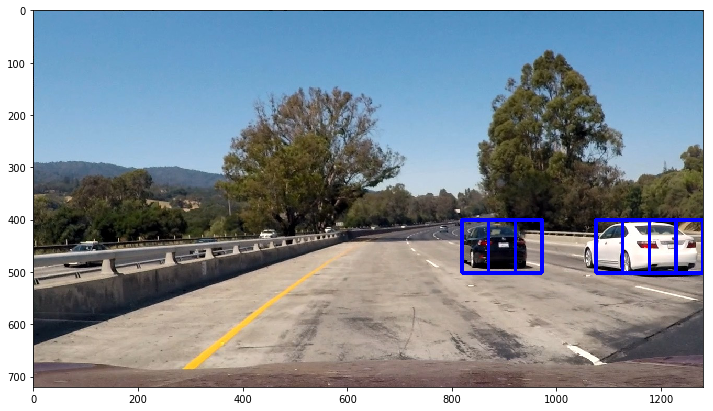

In [31]:
ystart = 400
ystop = 650
scale = 1.6

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

windows_out.append(windows)
plt.figure(figsize=(12,10))
plt.imshow(out_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


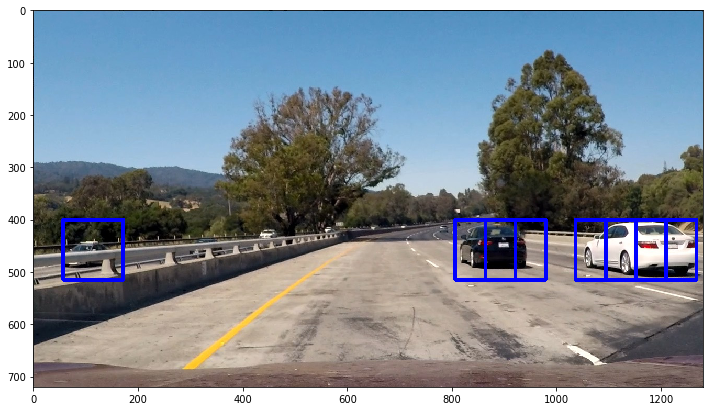

In [32]:
ystart = 400
ystop = 650
scale = 1.8

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


windows_out.append(windows)

plt.figure(figsize=(12,10))
plt.imshow(out_img)


C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


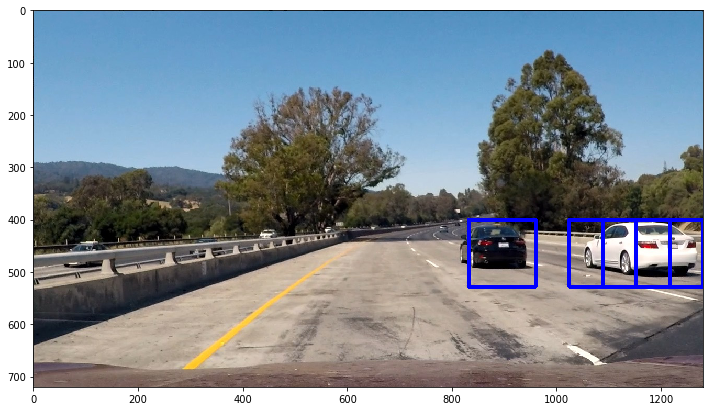

In [33]:
ystart = 400
ystop = 650
scale = 2.0

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


windows_out.append(windows)

plt.figure(figsize=(12,10))
plt.imshow(out_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


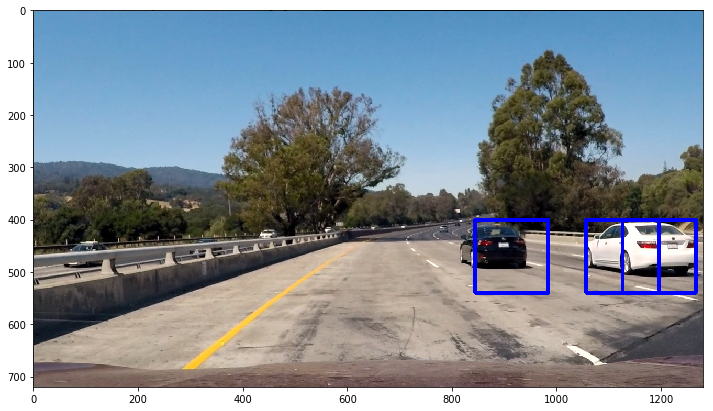

In [34]:
ystart = 400
ystop = 650
scale = 2.2

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


windows_out.append(windows)

plt.figure(figsize=(12,10))
plt.imshow(out_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


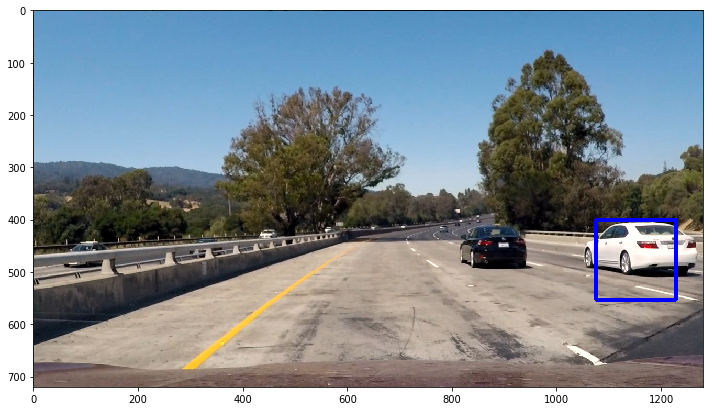

In [35]:
ystart = 400
ystop = 650
scale = 2.4

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


windows_out.append(windows)

plt.figure(figsize=(12,10))
plt.imshow(out_img)

C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


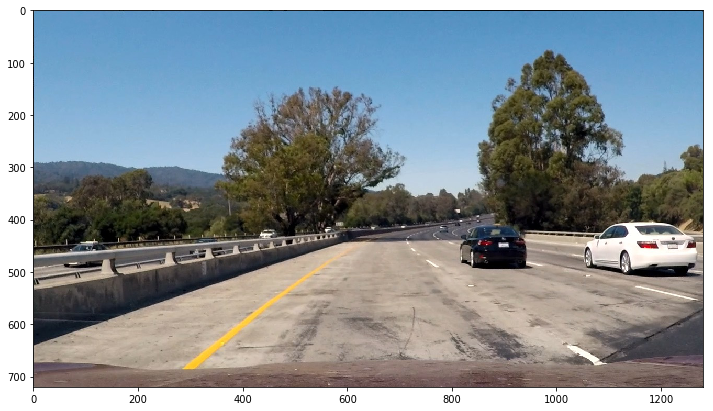

In [36]:
ystart = 400
ystop = 650
scale = 2.6

out_img,windows,ctrans = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


windows_out.append(windows)

plt.figure(figsize=(12,10))
plt.imshow(out_img)

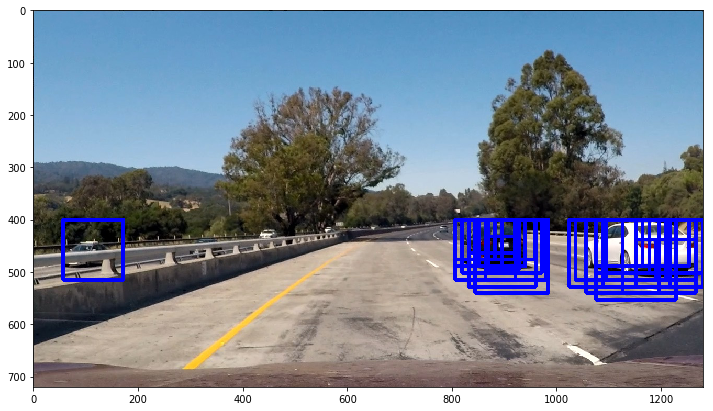

In [38]:
image_all = np.copy(img)

for box in windows_out :
    window_img = draw_boxes(image_all, box, color=(0, 0, 255), thick=6)  
    image_all = window_img
    
plt.figure(figsize=(12,10))
plt.imshow(window_img)

In [39]:
n_size = np.arange(1.0,2.7,0.2)

#x_start = np.arange(400,680,40)
ystart = 400
ystop = 650
    
print (n_size)

image = np.copy(img)

draw_image = np.copy(image)

n_windows = []

for scale in n_size :
    
    '''
    if scale < 1.2 :
        ystart = 400
        ystop = 528
    elif (scale >= 1.2 and scale < 2.2):
        ystart = 400
        ystop =  592
    else :
        ystart = 400
        ystopt = 656
    '''
    #print (ystart,ystop)
    
    out_img,windows,ctrans = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    #image = out_img
    
    if len(windows):
        n_windows.append(windows)


[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6]


C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


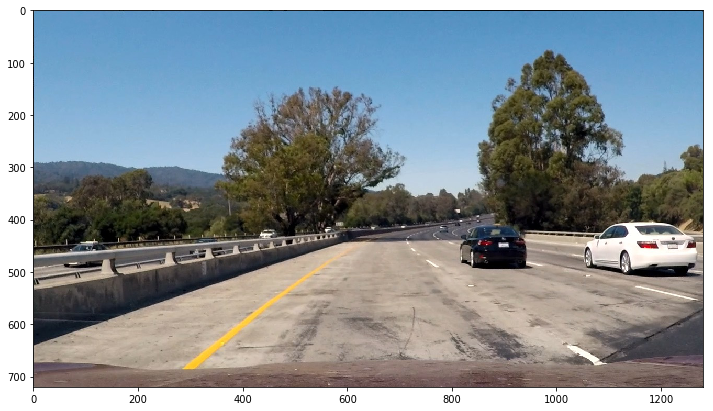

In [40]:
plt.figure(figsize=(12,10))
plt.imshow(out_img)

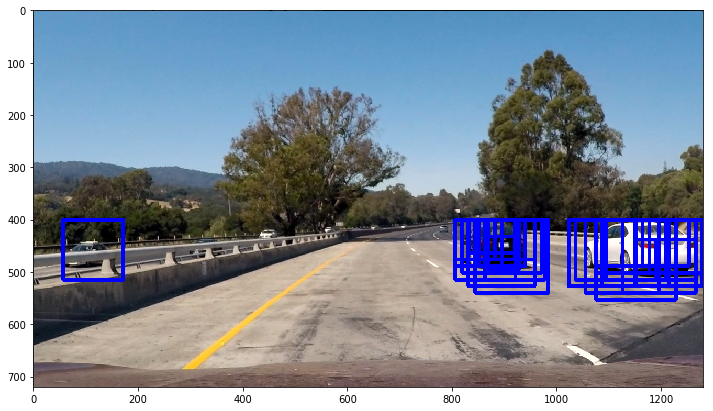

In [41]:
image_all = np.copy(img)

for box in n_windows :
    window_img = draw_boxes(image_all, box, color=(0, 0, 255), thick=6)  
    image_all = window_img
    
plt.figure(figsize=(12,10))
plt.imshow(window_img)

In [42]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        
        if (abs(bbox[0][0]-bbox[1][0]) >= 32) and (abs(bbox[0][1]-bbox[1][1]) >= 32) :
            
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


In [43]:
def heat_map(image,n_windows,thershold = 1):

    #box_list = pickle.load( open( "bbox_pickle.p", "rb" ))
    box_list = np.concatenate(n_windows)
    #print (box_list)

    # Read in image similar to one shown above 
    #image = mpimg.imread('test_image.jpg')

    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat_thershold = apply_threshold(heat,thershold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat_thershold, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)

    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img,heatmap

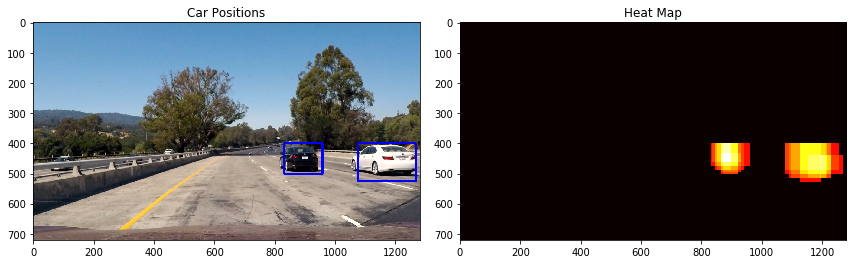

In [44]:
draw_img,heatmap = heat_map(draw_image,n_windows,thershold = 5)

fig = plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

In [45]:
n_size = np.arange(1.0,2.5,0.2)
ystart = 400
ystop = 656

print (n_size)
def process_image(image,heatmap=False):

    n_windows = []
    
    draw_image = np.copy(image)

    for scale in n_size :

        if scale < 1.5 :
            ystart = 400
            ystop = 528
        elif (scale >= 1.5 and scale < 1.9):
            ystart = 400
            ystop =  592
        else :
            ystart = 400
            ystopt = 656

        out_img,windows,ctrans = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

        if len(windows):
            n_windows.append(windows)
            
    if len(n_windows):
        
        draw_img,heat_img = heat_map(draw_image,n_windows,thershold=3)
            
    else :
        draw_img = draw_image
        heat_img = np.zeros_like(image)
        
    if heatmap :
        return draw_img,heat_img
    
    return draw_img
    

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]


C:\Users\DELL\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


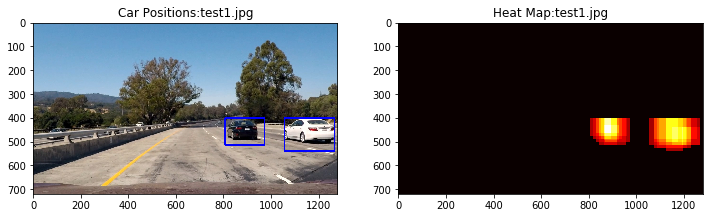

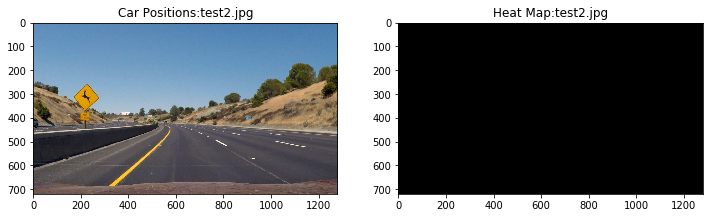

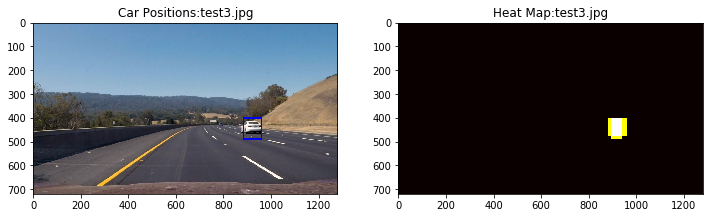

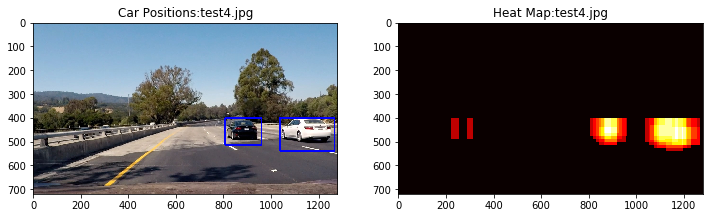

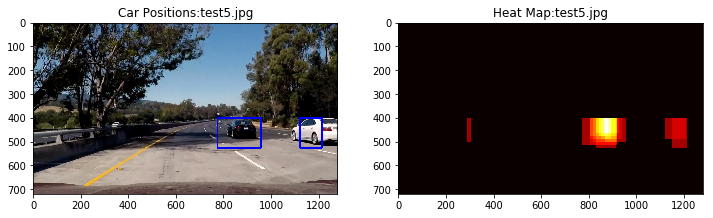

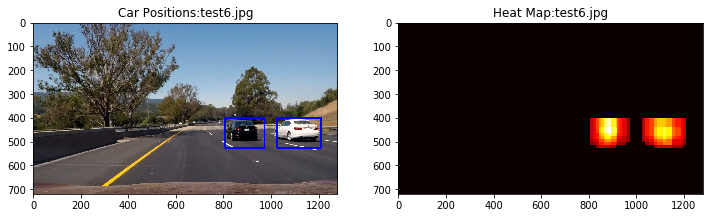

In [46]:
image_test_name = glob.glob('./test_images/*.jpg')

for image_name in image_test_name :
    
    image = mpimg.imread(image_name)
    
    draw_img,heat_img = process_image(image,heatmap=True)
        
    fig=plt.figure(figsize=(12,8))
    plt.subplot(121)
    plt.imshow(draw_img)
    plt.title('Car Positions:{}'.format(image_name.split('\\')[1]))
    
    plt.subplot(122)
    plt.imshow(heat_img,cmap='hot')
    plt.title('Heat Map:{}'.format(image_name.split('\\')[1]))



In [47]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [48]:
write_output = './project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds


clip1 = VideoFileClip("./project_video.mp4")#.subclip(39,40)
write_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time write_clip.write_videofile(write_output, audio=False)

[MoviePy] >>>> Building video ./project_video_output.mp4
[MoviePy] Writing video ./project_video_output.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1260/1261 [32:56<00:01,  1.57s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output.mp4 

Wall time: 32min 58s


In [49]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(write_output))